In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bs_path import BSPath
from heston_path import HestonPath
from pricing import MonteCarlo

# Black-Scholes pricing

### Trajectory test

In [2]:
bs_model = BSPath(r=.03, sigma=.2, S0=100)
traj = bs_model.simulation(100, 1/100, 100)

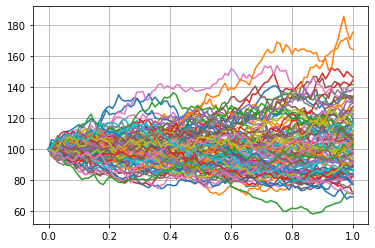

In [3]:
t = np.insert(traj, obj=0, values=100, axis=0)
plt.plot(np.arange(101)/100, t)
plt.grid();

### Autocallable pricing

In [7]:
autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)

In [8]:
bs_model = BSPath(r=.03, sigma=.25, S0=100)
traj = bs_model.simulation(4, 1/4, 10**5)

In [9]:
autocall.valuation(traj)

72.32% hit the barrier and the put is exercised 6.51% of the time
Barrier breach at time:
- 0.25 years: 15.61% of the time
- 0.5 years: 14.21% of the time
- 0.75 years: 15.42% of the time
- 1.0 years: 27.08% of the time


(108.86799490879416, 0.06197156608939145)

### Variation with the spot

In [10]:
spots = np.linspace(10, 300, 50)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=S0, freq=.25, mat=1, put_strike=.7*S0, notional=100)
    bs_model = BSPath(r=.03, sigma=.40, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

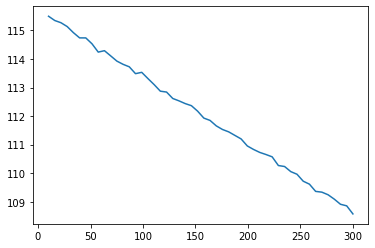

In [11]:
plt.plot(spots, prices[::, 0])

### Variation with the volatility

In [12]:
vols = np.linspace(.05, .5, 50)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.2, barrier=100, freq=.25, mat=1, put_strike=60, notional=100)
    bs_model = BSPath(r=.03, sigma=v, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

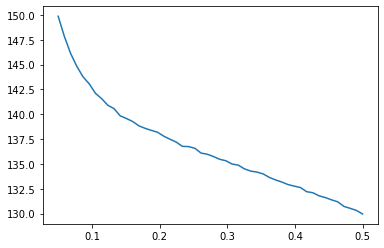

In [13]:
plt.plot(vols, prices[::, 0])

In [14]:
qs = np.linspace(.04, .20, 20)
prices = []
for qp in qs:
    autocall = MonteCarlo(rate=.03, q=qp, barrier=100, freq=.25, mat=1, put_strike=80, notional=100)
    bs_model = BSPath(r=.03, sigma=.2, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

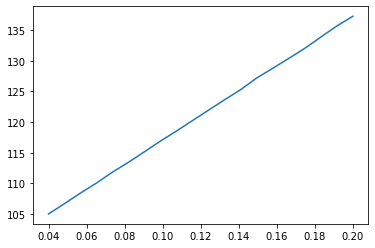

In [15]:
plt.plot(qs, prices[::, 0])

# Heston pricing

### Trajectory test

In [16]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
traj = heston_model.simulation(100, 1/100, 100)

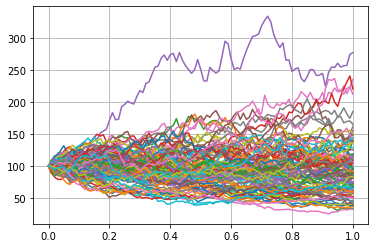

In [17]:
plt.plot(np.arange(101)/100, traj)
plt.grid();

### Autocallable pricing

In [26]:
autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)

In [27]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
full_traj = heston_model.simulation(4, 1/4, 10**5)
traj = full_traj[1:, ::]

In [28]:
autocall.valuation(traj)

66.15% hit the barrier and the put is exercised 21.56% of the time
Barrier breach at time:
- 0.25 years: 17.73% of the time
- 0.5 years: 13.82% of the time
- 0.75 years: 10.11% of the time
- 1.0 years: 24.49% of the time


(103.04912925181294, 0.11217366719925148)